In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import numpy.linalg as LA

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import datetime
import time
from datetime import datetime

from sklearn.model_selection import KFold, RepeatedKFold, cross_val_score, cross_validate 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from statistics import mean

import statsmodels.api as sm
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.tools.eval_measures import mse, rmse, meanabs, stde
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.tsa.seasonal import seasonal_decompose

from dateutil.parser import parse

from scipy.stats import pearsonr, spearmanr, kendalltau, poisson, bernoulli

In [3]:
url = "/content/drive/Shareddrives/Ciencia de datos y asi/Data/2012_2019_PlatteRiverWeir_features_merged_all.csv"
df = pd.read_csv(url)
df.head(3)

,SensorTime,CaptureTime,Filename,Agency,SiteNumber,TimeZone,Stage,Discharge,CalcTimestamp,width,...,WeirPt2X,WeirPt2Y,WwRawLineMin,WwRawLineMax,WwRawLineMean,WwRawLineSigma,WwCurveLineMin,WwCurveLineMax,WwCurveLineMean,WwCurveLineSigma
0,2012-06-09 13:15:00,2012-06-09T13:09:07,StateLineWeir_20120609_Farrell_001.jpg,USGS,6674500,MDT,2.99,916.0,2020-03-11T16:58:28,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2012-06-09 13:15:00,2012-06-09T13:10:29,StateLineWeir_20120609_Farrell_002.jpg,USGS,6674500,MDT,2.99,916.0,2020-03-11T16:58:33,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2012-06-09 13:45:00,2012-06-09T13:44:01,StateLineWeir_20120609_Farrell_003.jpg,USGS,6674500,MDT,2.96,873.0,2020-03-11T16:58:40,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
x = pd.to_datetime(df[' CaptureTime'], format="%Y-%m-%d %H:%M:%S")

time = []
for day in x:
  time.append(day.timestamp())
  
df["CaptureTimeSeconds"] = time
df["datetime"] = x

In [5]:
df_train = df[df['datetime'].dt.year < 2018].reset_index().copy()

In [6]:
df_test = df[df['datetime'].dt.year >= 2018].reset_index().copy()

## Data Analysis

### Variables

In [7]:
scaler = StandardScaler()

In [8]:
X_train = df_train[[ ' width', ' height', ' exposure',' grayMean', ' graySigma', 
        ' entropyMean', ' entropySigma', ' hMean', ' hSigma', ' sMean', 
        ' sSigma', ' vMean', ' vSigma', ' grayMean 0', 
        ' graySigma 0', ' entropyMean 0', ' entropySigma 0',' hMean 0',
        ' hSigma 0', ' sMean 0', ' sSigma 0', ' vMean 0', ' vSigma 0', 
        ' grayMean 1', ' graySigma 1', ' entropyMean 1', ' entropySigma 1',
        ' hMean 1', ' hSigma 1', ' sMean 1', ' sSigma 1', ' vMean 1',
        ' vSigma 1', ' WeirAngle', ' WeirPt1X', ' WeirPt1Y', ' WeirPt2X', 
        ' WwRawLineMin', ' WwRawLineMax', ' WwRawLineMean', 
        ' WwRawLineSigma', ' WwCurveLineMax', ' WwCurveLineMean', ' WwCurveLineSigma']]
y_train = df_train[ ' Discharge']

X_test = df_test[[ ' width', ' height', ' exposure',' grayMean', ' graySigma', 
        ' entropyMean', ' entropySigma', ' hMean', ' hSigma', ' sMean', 
        ' sSigma', ' vMean', ' vSigma', ' grayMean 0', 
        ' graySigma 0', ' entropyMean 0', ' entropySigma 0',' hMean 0',
        ' hSigma 0', ' sMean 0', ' sSigma 0', ' vMean 0', ' vSigma 0', 
        ' grayMean 1', ' graySigma 1', ' entropyMean 1', ' entropySigma 1',
        ' hMean 1', ' hSigma 1', ' sMean 1', ' sSigma 1', ' vMean 1',
        ' vSigma 1', ' WeirAngle', ' WeirPt1X', ' WeirPt1Y', ' WeirPt2X', 
        ' WwRawLineMin', ' WwRawLineMax', ' WwRawLineMean', 
        ' WwRawLineSigma', ' WwCurveLineMax', ' WwCurveLineMean', ' WwCurveLineSigma']]
y_test = df_test[ ' Discharge']

scaled_Xtrain = scaler.fit_transform(X_train)
scaled_Xtest = scaler.fit_transform(X_test)
#scaled_y = scaler.fit_transform(y)

X_train = pd.DataFrame(scaled_Xtrain, columns=X_train.columns)
#X_train = sm.add_constant(X_train)

X_test = pd.DataFrame(scaled_Xtest, columns=X_test.columns)
#X_test = sm.add_constant(X_test)
#y = pd.DataFrame(scaled_y, index=df.index, columns=y.columns)

### Correlation

In [ ]:
df = pd.concat([X_train, y_train], axis=1)
df.corr()

,width,height,exposure,grayMean,graySigma,entropyMean,entropySigma,hMean,hSigma,sMean,...,WeirPt1Y,WeirPt2X,WwRawLineMin,WwRawLineMax,WwRawLineMean,WwRawLineSigma,WwCurveLineMax,WwCurveLineMean,WwCurveLineSigma,Discharge
width,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exposure,NaN,NaN,1.000000,-0.320208,-0.106138,-0.294322,-0.284018,-0.310524,-0.067397,0.450923,...,0.044727,0.043949,-0.026981,-0.074080,-0.078651,-0.070298,-0.068056,-0.078385,-0.071857,-0.075282
grayMean,NaN,NaN,-0.320208,1.000000,-0.393259,0.613793,0.596126,0.997488,-0.445410,-0.183380,...,-0.066787,-0.051934,-0.007713,0.134464,0.071748,0.108933,0.126413,0.069318,0.101324,-0.178858
graySigma,NaN,NaN,-0.106138,-0.393259,1.000000,-0.239273,-0.194675,-0.445605,0.996003,0.023464,...,0.002789,-0.011061,-0.043921,-0.196033,-0.146378,-0.185031,-0.200779,-0.147765,-0.185363,0.006914
entropyMean,NaN,NaN,-0.294322,0.613793,-0.239273,1.000000,0.991398,0.618453,-0.264800,-0.211154,...,0.076288,0.085548,-0.018572,0.198516,0.089050,0.167608,0.181537,0.089314,0.153649,-0.281202
entropySigma,NaN,NaN,-0.284018,0.596126,-0.194675,0.991398,1.000000,0.598501,-0.217169,-0.195867,...,0.068587,0.078822,-0.027753,0.176391,0.062723,0.146665,0.158546,0.062688,0.131603,-0.288151
hMean,NaN,NaN,-0.310524,0.997488,-0.445605,0.618453,0.598501,1.000000,-0.495998,-0.197688,...,-0.067841,-0.052330,-0.001322,0.149070,0.085361,0.124654,0.141748,0.083134,0.117727,-0.163618
hSigma,NaN,NaN,-0.067397,-0.445410,0.996003,-0.264800,-0.217169,-0.495998,1.000000,0.057762,...,0.000307,-0.014496,-0.044137,-0.207232,-0.155897,-0.195151,-0.211001,-0.157283,-0.195077,0.005424
sMean,NaN,NaN,0.450923,-0.183380,0.023464,-0.211154,-0.195867,-0.197688,0.057762,1.000000,...,0.013750,0.010430,-0.137210,-0.253913,-0.281634,-0.273966,-0.256441,-0.282339,-0.288901,-0.360272


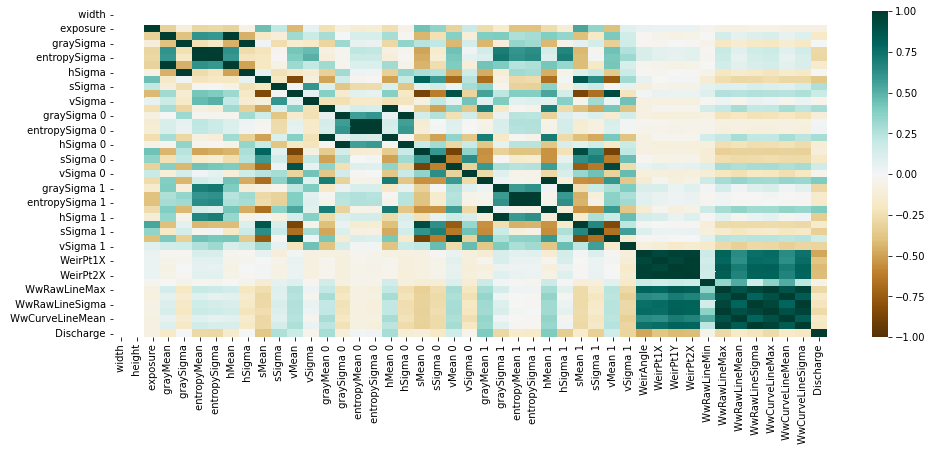

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='BrBG')

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Text(0.5, 1.0, 'Spearman correlation')

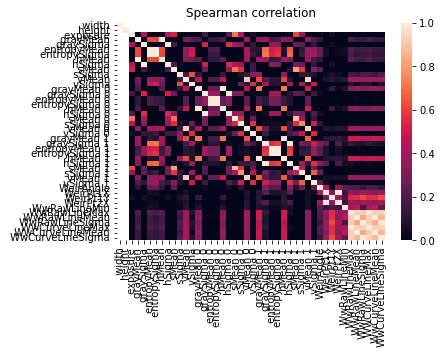

In [ ]:
nvar = X_train.columns.size
corr = X_train.corr()
cov = X_train.cov(ddof=1)

rho_pval = np.zeros((nvar, nvar))
rho = np.eye(nvar)

for i in range(nvar):
    for j in range(i+1, nvar):
        r = spearmanr(X_train.iloc[:, i], X_train.iloc[:, j])
        rho[i, j] = r[0]
        rho[j, i] = r[0]
        
        rho_pval[i, j] = r[1]
        rho_pval[j, i] = r[1]

sns.heatmap(rho, xticklabels=corr.columns, yticklabels=corr.columns, vmin=0, vmax=1)
plt.title("Spearman correlation")

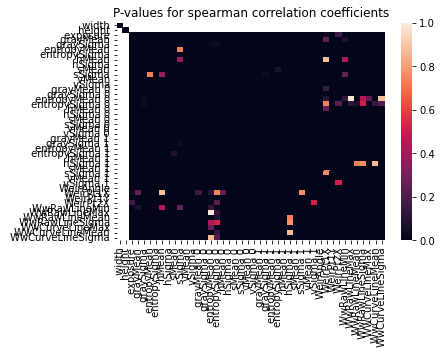

In [ ]:
plt.title("P-values for spearman correlation coefficients")
sns.heatmap(rho_pval, xticklabels=corr.columns, yticklabels=corr.columns, vmin=0, vmax=1)

In [ ]:
det = LA.det(cov)
det

0.0

### PCA

In [ ]:
pca = PCA(n_components = nvar)
pca.fit(X_train)

PCA(n_components=44)

Varianza explicada acumulada:
 [0.27802931 0.45589612 0.59631991 0.69249894 0.75541449 0.79918572
 0.83288104 0.85977135 0.88146397 0.8996249  0.91357449 0.92651162
 0.93834999 0.94973869 0.95918877 0.96669573 0.97309259 0.97804614
 0.98250623 0.98656924 0.99060362 0.99335036 0.99518576 0.99647735
 0.99755742 0.99835191 0.99893224 0.99928841 0.99958941 0.99970095
 0.99978498 0.99985002 0.99989436 0.99992642 0.99994728 0.99996425
 0.99997944 0.99998997 0.99999431 0.9999984  0.99999999 1.
 1.         1.        ]


Text(0.5, 1.0, 'Número de componentes vs porcentaje de varianza explicada')

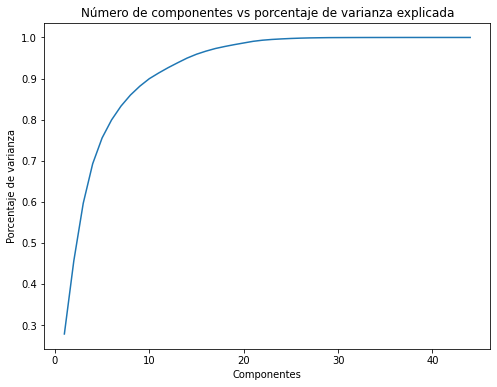

In [ ]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

print("Varianza explicada acumulada:\n", cumulative_variance)

plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 45, 1), cumulative_variance)
plt.xlabel("Componentes")
plt.ylabel("Porcentaje de varianza")
plt.title("Número de componentes vs porcentaje de varianza explicada")

## Models

In [9]:
print('min', min(df[' Discharge']))
print('max', max(df[' Discharge']))
print('mean', mean(df[' Discharge']))

min 0.0
max 7920.0
mean 970.9564392876673


### Linear Regression

In [10]:
modeLr = LinearRegression()
resLr = modeLr.fit(X_train, y_train)

In [11]:
y_pred = resLr.predict(X_test)
res = y_test.squeeze() - y_pred.squeeze()

print("MSE: ", mse(y_test.squeeze(), y_pred))
print("RSMSE: ", rmse(y_test.squeeze(), y_pred))
print("MAE: ", meanabs(y_test.squeeze(), y_pred))
print("Error estandar: ", stde(y_test.squeeze(), y_pred, ddof = 3))

MSE:  2056335.6655546962
RSMSE:  1433.9929098690468
MAE:  839.5650984153505
Error estandar:  1390.8540131850573


### Ridge Regression

In [12]:
ridgeMod = Ridge(alpha=1.0)
resRid = ridgeMod.fit(X_train, y_train)

In [13]:
y_pred = resRid.predict(X_test)
res = y_test.squeeze() - y_pred.squeeze()

print("MSE: ", mse(y_test.squeeze(), y_pred))
print("RSMSE: ", rmse(y_test.squeeze(), y_pred))
print("MAE: ", meanabs(y_test.squeeze(), y_pred))
print("Error estandar: ", stde(y_test.squeeze(), y_pred, ddof = 3))

MSE:  527432.1676156112
RSMSE:  726.2452530761294
MAE:  537.5399948105946
Error estandar:  636.5729263374828


### Lasso Regression

In [10]:
lassoMod = Lasso(alpha=1.0)
resLasso = lassoMod.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.066e+08, tolerance: 5.105e+06
  model = cd_fast.enet_coordinate_descent(


In [11]:
y_pred = resLasso.predict(X_test)
res = y_test.squeeze() - y_pred.squeeze()

print("MSE: ", mse(y_test.squeeze(), y_pred))
print("RSMSE: ", rmse(y_test.squeeze(), y_pred))
print("MAE: ", meanabs(y_test.squeeze(), y_pred))
print("Error estandar: ", stde(y_test.squeeze(), y_pred, ddof = 3))

MSE:  512450.7854377941
RSMSE:  715.8566793973456
MAE:  541.847354591589
Error estandar:  624.6921762568376


Text(0.5, 0, 'Lasso Regression Feature Importance')

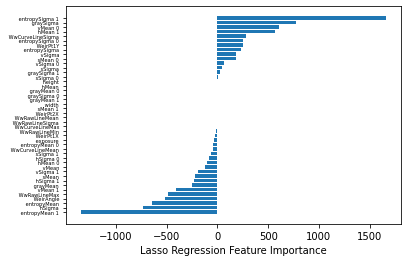

In [12]:
sorted_idx = resLasso.coef_.argsort()
plt.barh(X_train.columns[sorted_idx], resLasso.coef_[sorted_idx])
plt.yticks(fontsize=5)
plt.xlabel("Lasso Regression Feature Importance")

In [13]:
X_train.columns[sorted_idx]

Index([' entropyMean 1', ' hSigma', ' entropyMean', ' WeirAngle',
       ' WwRawLineMax', ' vMean 1', ' grayMean', ' hSigma 1', ' sMean',
       ' vSigma 1', ' vMean', ' hMean 0', ' hSigma 0', ' sSigma 1',
       ' WwCurveLineMean', ' entropyMean 0', ' exposure', ' WeirPt1X',
       ' WwRawLineMin', ' WwCurveLineMax', ' WwRawLineSigma', ' WwRawLineMean',
       ' WeirPt2X', ' sMean 1', ' width', ' grayMean 1', ' graySigma 0',
       ' grayMean 0', ' hMean', ' height', ' sSigma 0', ' graySigma 1',
       ' sSigma', ' vSigma 0', ' sMean 0', ' vSigma', ' entropySigma',
       ' WeirPt1Y', ' entropySigma 0', ' WwCurveLineSigma', ' hMean 1',
       ' vMean 0', ' graySigma', ' entropySigma 1'],
      dtype='object')

### Knn

In [ ]:
error = []

for i in range(1,100):
 kNN = KNeighborsRegressor(n_neighbors=i, metric='euclidean')
 kNN.fit(X_train, y_train)
 ypred = kNN.predict(X_test)
 error.append(meanabs(y_test, ypred))

k = np.array(error).argmin() + 1
print("Minimum error:",min(error))
print("k = ", k)

Minimum error: 308.14667540113874
k =  7


Text(0, 0.5, 'Mean Absolute Error')

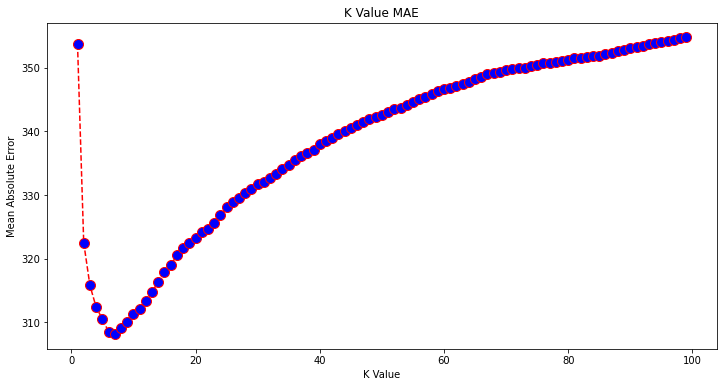

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), error, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

In [16]:
kMod = KNeighborsRegressor(n_neighbors=75)
resK = kMod.fit(X_train, y_train)

In [17]:
y_pred = resK.predict(X_test)
res = y_test.squeeze() - y_pred.squeeze()

print("MSE: ", mse(y_test.squeeze(), y_pred))
print("RSMSE: ", rmse(y_test.squeeze(), y_pred))
print("MAE: ", meanabs(y_test.squeeze(), y_pred))
print("Error estandar: ", stde(y_test.squeeze(), y_pred, ddof = 3))

MSE:  393780.76821470464
RSMSE:  627.5195361219479
MAE:  350.5308620571658
Error estandar:  590.3670132586354


### Decision Tree

In [18]:
dTreeMod = DecisionTreeRegressor(random_state=0)
resTree = dTreeMod.fit(X_train, y_train)

In [19]:
y_pred = resTree.predict(X_test)
res = y_test.squeeze() - y_pred.squeeze()

print("MSE: ", mse(y_test.squeeze(), y_pred))
print("RSMSE: ", rmse(y_test.squeeze(), y_pred))
print("MAE: ", meanabs(y_test.squeeze(), y_pred))
print("Error estandar: ", stde(y_test.squeeze(), y_pred, ddof = 3))

MSE:  1015884.1218386474
RSMSE:  1007.9107707722184
MAE:  524.7947871376812
Error estandar:  971.7103837456598


### Random Forest

In [20]:
rForMod = RandomForestRegressor()
rForRes = rForMod.fit(X_train, y_train)

In [21]:
y_pred = resTree.predict(X_test)
res = y_test.squeeze() - y_pred.squeeze()

print("MSE: ", mse(y_test.squeeze(), y_pred))
print("RSMSE: ", rmse(y_test.squeeze(), y_pred))
print("MAE: ", meanabs(y_test.squeeze(), y_pred))
print("Error estandar: ", stde(y_test.squeeze(), y_pred, ddof = 3))

MSE:  1015884.1218386474
RSMSE:  1007.9107707722184
MAE:  524.7947871376812
Error estandar:  971.7103837456598


## Lasso Regression with Seasons  

In [22]:
spring = df_test[((df_test['datetime'].dt.day >= 21) & (df_test['datetime'].dt.month == 3)) | ((df_test['datetime'].dt.month >= 4) & (df_test['datetime'].dt.month <= 5)) | ((df_test['datetime'].dt.day <= 20) & (df_test['datetime'].dt.month == 6))]
spring_idx = spring.index

summer = df_test[((df_test['datetime'].dt.day >= 21) & (df_test['datetime'].dt.month == 6)) | ((df_test['datetime'].dt.month >= 7) & (df_test['datetime'].dt.month <= 8)) | ((df_test['datetime'].dt.day <= 22) & (df_test['datetime'].dt.month == 9))]
summer_idx = summer.index


autumn = df_test[((df_test['datetime'].dt.day >= 23) & (df_test['datetime'].dt.month == 9)) | ((df_test['datetime'].dt.month >= 10) & (df_test['datetime'].dt.month <= 11)) | ((df_test['datetime'].dt.day <= 20) & (df_test['datetime'].dt.month == 12))]
autumn_idx = autumn.index


winter = df_test[((df_test['datetime'].dt.day >= 21) & (df_test['datetime'].dt.month == 12)) | ((df_test['datetime'].dt.month >= 1) & (df_test['datetime'].dt.month <= 2)) | ((df_test['datetime'].dt.day <= 20) & (df_test['datetime'].dt.month == 3))]
winter_idx = winter.index

### Spring

In [23]:
spring_X = spring[[ ' width', ' height', ' exposure',' grayMean', ' graySigma', 
        ' entropyMean', ' entropySigma', ' hMean', ' hSigma', ' sMean', 
        ' sSigma', ' vMean', ' vSigma', ' grayMean 0', 
        ' graySigma 0', ' entropyMean 0', ' entropySigma 0',' hMean 0',
        ' hSigma 0', ' sMean 0', ' sSigma 0', ' vMean 0', ' vSigma 0', 
        ' grayMean 1', ' graySigma 1', ' entropyMean 1', ' entropySigma 1',
        ' hMean 1', ' hSigma 1', ' sMean 1', ' sSigma 1', ' vMean 1',
        ' vSigma 1', ' WeirAngle', ' WeirPt1X', ' WeirPt1Y', ' WeirPt2X', 
        ' WwRawLineMin', ' WwRawLineMax', ' WwRawLineMean', 
        ' WwRawLineSigma', ' WwCurveLineMax', ' WwCurveLineMean', ' WwCurveLineSigma']]
spring_y = spring[[ ' Discharge']]

scaled_spring_X = scaler.fit_transform(spring_X)
#scaled_spring_y = scaler.fit_transform(spring_y)

spring_X = pd.DataFrame(scaled_spring_X, index=spring_idx, columns=spring_X.columns)
#spring_X = sm.add_constant(spring_X)
#spring_y = pd.DataFrame(scaled_spring_y, index=spring_idx, columns=spring_y.columns)

In [24]:
y_pred = resLasso.predict(spring_X)
y = spring_y

print("MSE: ", mse(y.squeeze(), y_pred))
print("RSMSE: ", rmse(y.squeeze(), y_pred))
print("MAE: ", meanabs(y.squeeze(), y_pred))
print("Error estandar: ", stde(y.squeeze(), y_pred, ddof = 3))

MSE:  764546.3912316747
RSMSE:  874.3834349023743
MAE:  700.0151357128892
Error estandar:  651.4665277835396


### Summer

In [25]:
summer_X = summer[[ ' width', ' height', ' exposure',' grayMean', ' graySigma', 
        ' entropyMean', ' entropySigma', ' hMean', ' hSigma', ' sMean', 
        ' sSigma', ' vMean', ' vSigma', ' grayMean 0', 
        ' graySigma 0', ' entropyMean 0', ' entropySigma 0',' hMean 0',
        ' hSigma 0', ' sMean 0', ' sSigma 0', ' vMean 0', ' vSigma 0', 
        ' grayMean 1', ' graySigma 1', ' entropyMean 1', ' entropySigma 1',
        ' hMean 1', ' hSigma 1', ' sMean 1', ' sSigma 1', ' vMean 1',
        ' vSigma 1', ' WeirAngle', ' WeirPt1X', ' WeirPt1Y', ' WeirPt2X', 
        ' WwRawLineMin', ' WwRawLineMax', ' WwRawLineMean', 
        ' WwRawLineSigma', ' WwCurveLineMax', ' WwCurveLineMean', ' WwCurveLineSigma']]
summer_y = summer[[ ' Discharge']]

scaled_summer_X = scaler.fit_transform(summer_X)
#scaled_summer_y = scaler.fit_transform(summer_y)

summer_X = pd.DataFrame(scaled_summer_X, index=summer_idx, columns=summer_X.columns)
#summer_X = sm.add_constant(summer_X)
#summer_y = pd.DataFrame(scaled_summer_y, index=summer_idx, columns=summer_y.columns)

In [26]:
y_pred = resLasso.predict(summer_X)
y = summer_y

print("MSE: ", mse(y.squeeze(), y_pred))
print("RSMSE: ", rmse(y.squeeze(), y_pred))
print("MAE: ", meanabs(y.squeeze(), y_pred))
print("Error estandar: ", stde(y.squeeze(), y_pred, ddof = 3))

MSE:  466004.03967529564
RSMSE:  682.6448854824122
MAE:  558.1831351633073
Error estandar:  528.4082426235841


### Autumn

In [27]:
autumn_X = autumn[[ ' width', ' height', ' exposure',' grayMean', ' graySigma', 
        ' entropyMean', ' entropySigma', ' hMean', ' hSigma', ' sMean', 
        ' sSigma', ' vMean', ' vSigma', ' grayMean 0', 
        ' graySigma 0', ' entropyMean 0', ' entropySigma 0',' hMean 0',
        ' hSigma 0', ' sMean 0', ' sSigma 0', ' vMean 0', ' vSigma 0', 
        ' grayMean 1', ' graySigma 1', ' entropyMean 1', ' entropySigma 1',
        ' hMean 1', ' hSigma 1', ' sMean 1', ' sSigma 1', ' vMean 1',
        ' vSigma 1', ' WeirAngle', ' WeirPt1X', ' WeirPt1Y', ' WeirPt2X', 
        ' WwRawLineMin', ' WwRawLineMax', ' WwRawLineMean', 
        ' WwRawLineSigma', ' WwCurveLineMax', ' WwCurveLineMean', ' WwCurveLineSigma']]
autumn_y = autumn[[ ' Discharge']]

scaled_autumn_X = scaler.fit_transform(autumn_X)
#scaled_autumn_y = scaler.fit_transform(autumn_y)

autumn_X = pd.DataFrame(scaled_autumn_X, index=autumn_idx, columns=autumn_X.columns)
#autumn_X = sm.add_constant(autumn_X)
#autumn_y = pd.DataFrame(scaled_autumn_y, index=autumn_idx, columns=autumn_y.columns)

In [28]:
y_pred = resLasso.predict(autumn_X)
y = autumn_y

print("MSE: ", mse(y.squeeze(), y_pred))
print("RSMSE: ", rmse(y.squeeze(), y_pred))
print("MAE: ", meanabs(y.squeeze(), y_pred))
print("Error estandar: ", stde(y.squeeze(), y_pred, ddof = 3))

MSE:  909691.9288436286
RSMSE:  953.7777145874339
MAE:  797.4875993131614
Error estandar:  590.7373199526924


### Winter

In [29]:
winter_X = winter[[ ' width', ' height', ' exposure',' grayMean', ' graySigma', 
        ' entropyMean', ' entropySigma', ' hMean', ' hSigma', ' sMean', 
        ' sSigma', ' vMean', ' vSigma', ' grayMean 0', 
        ' graySigma 0', ' entropyMean 0', ' entropySigma 0',' hMean 0',
        ' hSigma 0', ' sMean 0', ' sSigma 0', ' vMean 0', ' vSigma 0', 
        ' grayMean 1', ' graySigma 1', ' entropyMean 1', ' entropySigma 1',
        ' hMean 1', ' hSigma 1', ' sMean 1', ' sSigma 1', ' vMean 1',
        ' vSigma 1', ' WeirAngle', ' WeirPt1X', ' WeirPt1Y', ' WeirPt2X', 
        ' WwRawLineMin', ' WwRawLineMax', ' WwRawLineMean', 
        ' WwRawLineSigma', ' WwCurveLineMax', ' WwCurveLineMean', ' WwCurveLineSigma']]
winter_y = winter[[ ' Discharge']]

scaled_winter_X = scaler.fit_transform(winter_X)
#scaled_winter_y = scaler.fit_transform(winter_y)

winter_X = pd.DataFrame(scaled_winter_X, index=winter_idx, columns=winter_X.columns)
#winter_X = sm.add_constant(winter_X)
#winter_y = pd.DataFrame(scaled_winter_y, index=winter_idx, columns=winter_y.columns)

In [30]:
y_pred = resLasso.predict(winter_X)
y = winter_y

print("MSE: ", mse(y.squeeze(), y_pred))
print("RSMSE: ", rmse(y.squeeze(), y_pred))
print("MAE: ", meanabs(y.squeeze(), y_pred))
print("Error estandar: ", stde(y.squeeze(), y_pred, ddof = 3))

MSE:  1505277.8171741772
RSMSE:  1226.897639240608
MAE:  1039.7800952986634
Error estandar:  791.2531112168937
